<h4>I used Claude, Anthropic's model to help with the code portion of this assignment.</h4>
<h4>I used Copilot for help understanding these concepts.</h4>
<h4>I used MathGPT and ChatGPT for the math portions.</h4>

(1) Homoscedasticity is one of the assumptions required to show that Ordinary Least Squares is BLUE. OLS will still be unbiased in the presence of heteroscedasticity, i.e., $\mathbb{E}[\hat{\beta}] = \beta$, in the presence of heteroscedasticity. However, heteroscedasticity increases the variance of the OLS estimator. Run a simulation that loops the OLS estimator over data with and without heteroscedasticity and then show that the slope estimates from the heteroscedastic data has higher variance. Note that $\operatorname{Var}(\hat{\beta})$ this is different than what I do in the video by just looking at one standard error. Note that depends on other things that you should try to hold as close to constant as possible in your simulation.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import scipy.stats as stats
import statsmodels.api as sm

HETEROSCEDASTICITY AND OLS VARIANCE SIMULATION
This simulation demonstrates that:
1. OLS remains UNBIASED under heteroscedasticity
2. Heteroscedasticity INCREASES the variance of OLS estimators
3. This violates the 'Best' part of BLUE (Best Linear Unbiased Estimator)

Running 1000 simulations with sample size 100...
Completed 100 simulations...
Completed 200 simulations...
Completed 300 simulations...
Completed 400 simulations...
Completed 500 simulations...
Completed 600 simulations...
Completed 700 simulations...
Completed 800 simulations...
Completed 900 simulations...
Completed 1000 simulations...

SIMULATION RESULTS
True β₁: 1.5
Number of simulations: 1000
Sample size per simulation: 100

HOMOSCEDASTIC OLS:
  Mean of β̂₁: 1.499887
  Variance of β̂₁: 0.00277095
  Standard deviation: 0.052640
  Bias: -0.000113

HETEROSCEDASTIC OLS:
  Mean of β̂₁: 1.499221
  Variance of β̂₁: 0.01610858
  Standard deviation: 0.126920
  Bias: -0.000779

COMPARISON:
  Variance ratio (Hetero/Homo): 5.813

C:\Users\ianta\AppData\Local\Temp\ipykernel_29004\1770310824.py:190: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(box_data, labels=box_labels, patch_artist=True)


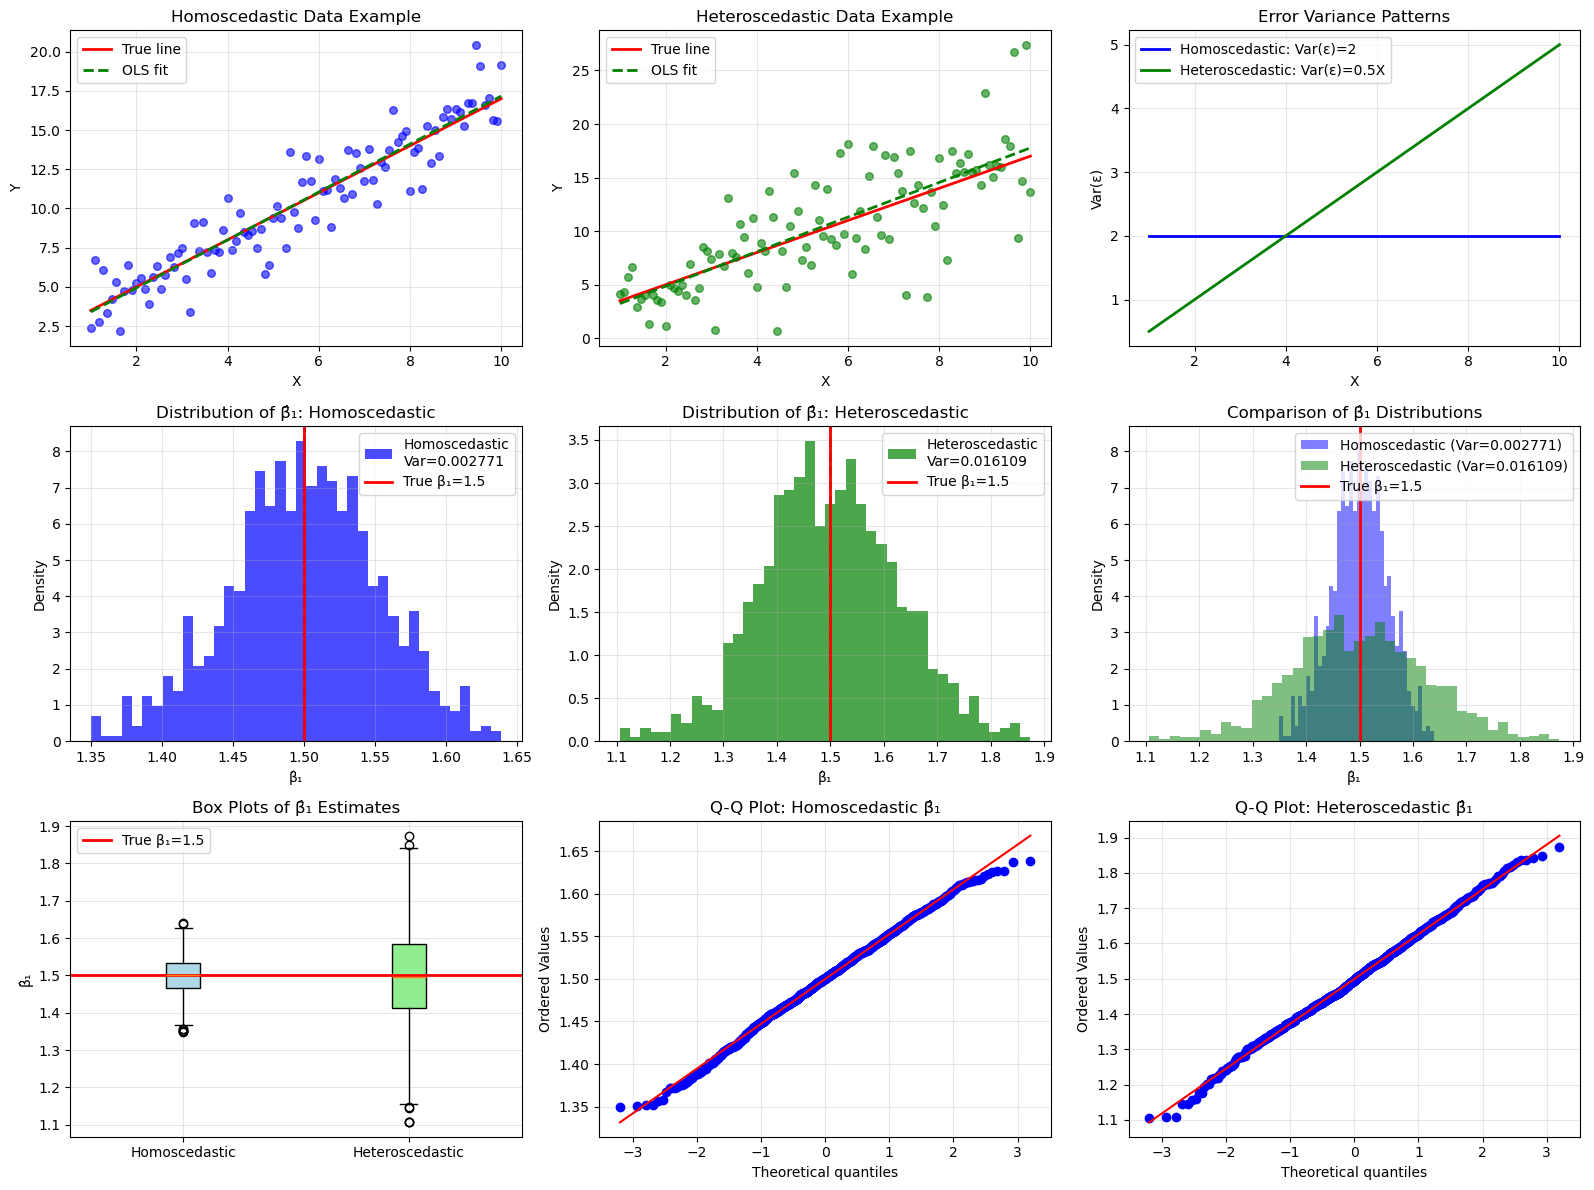

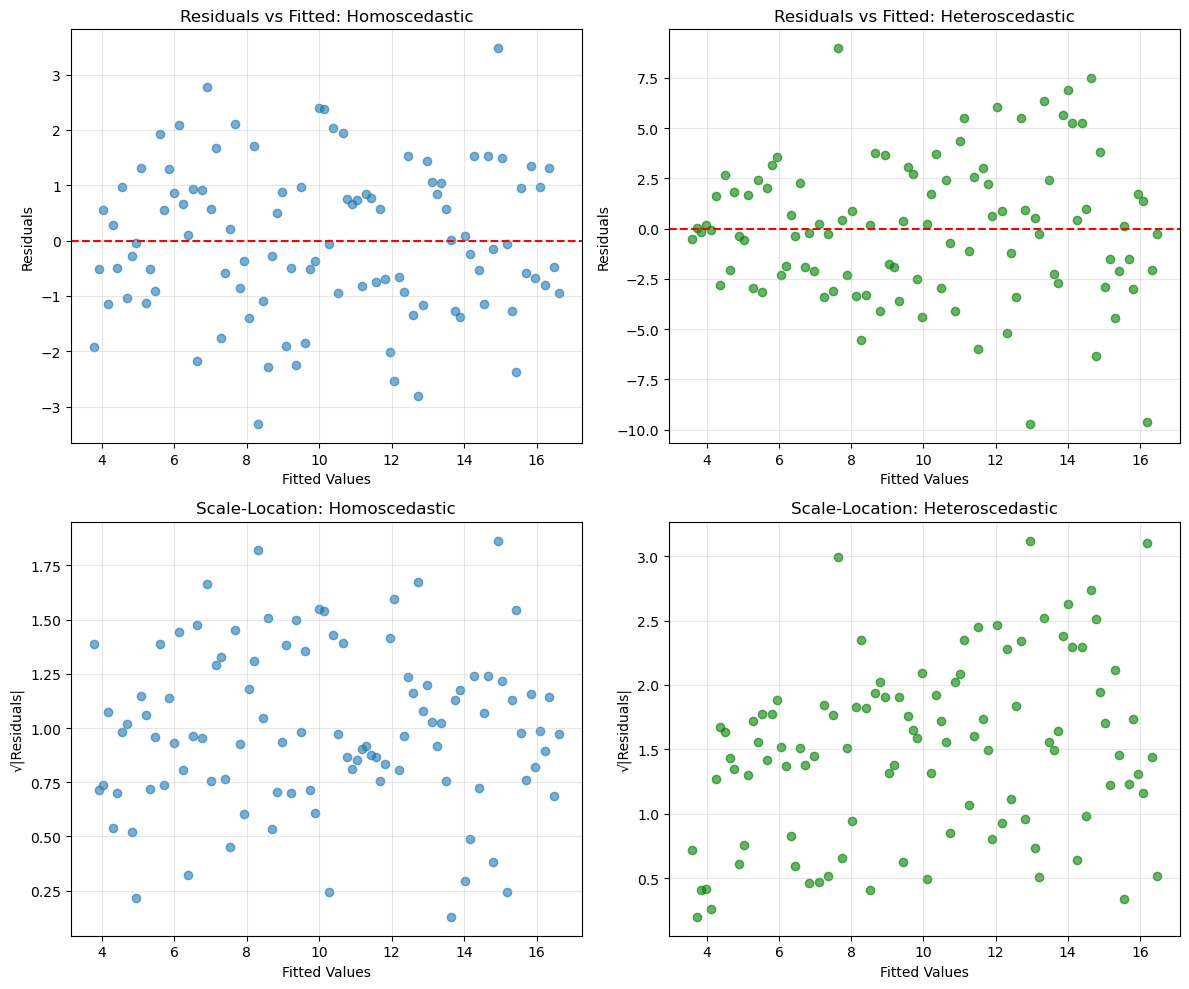


HOMOSCEDASTIC MODEL SUMMARY:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     755.8
Date:                Sun, 21 Sep 2025   Prob (F-statistic):           7.33e-48
Time:                        11:38:06   Log-Likelihood:                -171.65
No. Observations:                 100   AIC:                             347.3
Df Residuals:                      98   BIC:                             352.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3610 

In [11]:
# Set random seed for reproducibility
np.random.seed(1)

def generate_data(n, beta0=2, beta1=1.5, heteroscedastic=False):
    """
    Generate regression data with or without heteroscedasticity
    
    Parameters:
    n: sample size
    beta0, beta1: true parameters
    heteroscedastic: if True, error variance increases with X
    """
    # Generate X values uniformly between 1 and 10
    X = np.linspace(1, 10, n)
    
    if heteroscedastic:
        error_std = np.sqrt(2 * X)
    else:
        # Constant variance (homoscedastic): Var(ε) = 2
        error_std = np.sqrt(2) * np.ones(n)
    
    # Generate errors
    errors = np.random.normal(0, error_std)
    
    # True relationship: Y = beta0 + beta1*X + error
    Y = beta0 + beta1 * X + errors
    
    return X, Y, error_std

def run_ols_simulation(n_simulations=1000, sample_size=100):
    """
    Run Monte Carlo simulation comparing homoscedastic vs heteroscedastic OLS
    """
    print(f"Running {n_simulations} simulations with sample size {sample_size}...")
    print("=" * 60)
    
    # Storage for results
    beta1_homo = []  # Homoscedastic estimates
    beta1_hetero = []  # Heteroscedastic estimates
    
    true_beta1 = 1.5
    
    for i in range(n_simulations):
        if (i + 1) % 100 == 0:
            print(f"Completed {i + 1} simulations...")
        
        # Homoscedastic case
        X_homo, Y_homo, _ = generate_data(sample_size, heteroscedastic=False)
        reg_homo = LinearRegression()
        reg_homo.fit(X_homo.reshape(-1, 1), Y_homo)
        beta1_homo.append(reg_homo.coef_[0])
        
        # Heteroscedastic case
        X_hetero, Y_hetero, _ = generate_data(sample_size, heteroscedastic=True)
        reg_hetero = LinearRegression()
        reg_hetero.fit(X_hetero.reshape(-1, 1), Y_hetero)
        beta1_hetero.append(reg_hetero.coef_[0])
    
    # Convert to numpy arrays
    beta1_homo = np.array(beta1_homo)
    beta1_hetero = np.array(beta1_hetero)
    
    # Calculate statistics
    homo_mean = np.mean(beta1_homo)
    hetero_mean = np.mean(beta1_hetero)
    homo_var = np.var(beta1_homo, ddof=1)
    hetero_var = np.var(beta1_hetero, ddof=1)
    homo_std = np.std(beta1_homo, ddof=1)
    hetero_std = np.std(beta1_hetero, ddof=1)
    
    # Calculate bias
    homo_bias = homo_mean - true_beta1
    hetero_bias = hetero_mean - true_beta1
    
    # Print results
    print("\nSIMULATION RESULTS")
    print("=" * 60)
    print(f"True β₁: {true_beta1}")
    print(f"Number of simulations: {n_simulations}")
    print(f"Sample size per simulation: {sample_size}")
    print()
    
    print("HOMOSCEDASTIC OLS:")
    print(f"  Mean of β̂₁: {homo_mean:.6f}")
    print(f"  Variance of β̂₁: {homo_var:.8f}")
    print(f"  Standard deviation: {homo_std:.6f}")
    print(f"  Bias: {homo_bias:.6f}")
    print()
    
    print("HETEROSCEDASTIC OLS:")
    print(f"  Mean of β̂₁: {hetero_mean:.6f}")
    print(f"  Variance of β̂₁: {hetero_var:.8f}")
    print(f"  Standard deviation: {hetero_std:.6f}")
    print(f"  Bias: {hetero_bias:.6f}")
    print()
    
    print("COMPARISON:")
    variance_ratio = hetero_var / homo_var
    print(f"  Variance ratio (Hetero/Homo): {variance_ratio:.4f}")
    print(f"  % Increase in variance: {(variance_ratio - 1) * 100:.2f}%")
    print(f"  Both estimators are unbiased: |bias| < 0.01 for both? {abs(homo_bias) < 0.01 and abs(hetero_bias) < 0.01}")
    
    return beta1_homo, beta1_hetero, homo_var, hetero_var

def create_visualizations(beta1_homo, beta1_hetero, homo_var, hetero_var, 
                         sample_size=100):
    """
    Create comprehensive visualizations
    """
    fig = plt.figure(figsize=(16, 12))
    
    # 1. Example datasets
    plt.subplot(3, 3, 1)
    X_homo, Y_homo, _ = generate_data(sample_size, heteroscedastic=False)
    plt.scatter(X_homo, Y_homo, alpha=0.6, color='blue', s=30)
    plt.plot(X_homo, 2 + 1.5 * X_homo, 'r-', linewidth=2, label='True line')
    reg_homo = LinearRegression().fit(X_homo.reshape(-1, 1), Y_homo)
    plt.plot(X_homo, reg_homo.predict(X_homo.reshape(-1, 1)), 'g--', linewidth=2, label='OLS fit')
    plt.title('Homoscedastic Data Example')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 3, 2)
    X_hetero, Y_hetero, error_std = generate_data(sample_size, heteroscedastic=True)
    plt.scatter(X_hetero, Y_hetero, alpha=0.6, color='green', s=30)
    plt.plot(X_hetero, 2 + 1.5 * X_hetero, 'r-', linewidth=2, label='True line')
    reg_hetero = LinearRegression().fit(X_hetero.reshape(-1, 1), Y_hetero)
    plt.plot(X_hetero, reg_hetero.predict(X_hetero.reshape(-1, 1)), 'g--', linewidth=2, label='OLS fit')
    plt.title('Heteroscedastic Data Example')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Show error variance pattern
    plt.subplot(3, 3, 3)
    X_range = np.linspace(1, 10, 100)
    homo_var_line = np.full_like(X_range, 2)  # Constant variance = 2
    hetero_var_line = 0.5 * X_range  # Variance = 0.5 * X
    plt.plot(X_range, homo_var_line, 'b-', linewidth=2, label='Homoscedastic: Var(ε)=2')
    plt.plot(X_range, hetero_var_line, 'g-', linewidth=2, label='Heteroscedastic: Var(ε)=0.5X')
    plt.title('Error Variance Patterns')
    plt.xlabel('X')
    plt.ylabel('Var(ε)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 3. Histograms of slope estimates
    plt.subplot(3, 3, 4)
    plt.hist(beta1_homo, bins=40, alpha=0.7, color='blue', density=True, 
             label=f'Homoscedastic\nVar={homo_var:.6f}')
    plt.axvline(np.mean(beta1_homo), color='blue', linestyle='--', linewidth=2)
    plt.axvline(1.5, color='red', linestyle='-', linewidth=2, label='True β₁=1.5')
    plt.title('Distribution of β̂₁: Homoscedastic')
    plt.xlabel('β̂₁')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 3, 5)
    plt.hist(beta1_hetero, bins=40, alpha=0.7, color='green', density=True,
             label=f'Heteroscedastic\nVar={hetero_var:.6f}')
    plt.axvline(np.mean(beta1_hetero), color='green', linestyle='--', linewidth=2)
    plt.axvline(1.5, color='red', linestyle='-', linewidth=2, label='True β₁=1.5')
    plt.title('Distribution of β̂₁: Heteroscedastic')
    plt.xlabel('β̂₁')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. Overlaid histograms for direct comparison
    plt.subplot(3, 3, 6)
    plt.hist(beta1_homo, bins=40, alpha=0.5, color='blue', density=True, 
             label=f'Homoscedastic (Var={homo_var:.6f})')
    plt.hist(beta1_hetero, bins=40, alpha=0.5, color='green', density=True,
             label=f'Heteroscedastic (Var={hetero_var:.6f})')
    plt.axvline(1.5, color='red', linestyle='-', linewidth=2, label='True β₁=1.5')
    plt.title('Comparison of β̂₁ Distributions')
    plt.xlabel('β̂₁')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 5. Box plots
    plt.subplot(3, 3, 7)
    box_data = [beta1_homo, beta1_hetero]
    box_labels = ['Homoscedastic', 'Heteroscedastic']
    bp = plt.boxplot(box_data, labels=box_labels, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightgreen')
    plt.axhline(1.5, color='red', linestyle='-', linewidth=2, label='True β₁=1.5')
    plt.title('Box Plots of β̂₁ Estimates')
    plt.ylabel('β̂₁')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 6. Q-Q plots to check normality
    plt.subplot(3, 3, 8)
    stats.probplot(beta1_homo, dist="norm", plot=plt)
    plt.title('Q-Q Plot: Homoscedastic β̂₁')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 3, 9)
    stats.probplot(beta1_hetero, dist="norm", plot=plt)
    plt.title('Q-Q Plot: Heteroscedastic β̂₁')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

def demonstrate_residual_plots(sample_size=100):
    """
    Show residual plots to visualize heteroscedasticity
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Generate datasets
    X_homo, Y_homo, _ = generate_data(sample_size, heteroscedastic=False)
    X_hetero, Y_hetero, _ = generate_data(sample_size, heteroscedastic=True)
    
    # Fit models using statsmodels for better residual analysis
    X_homo_sm = sm.add_constant(X_homo)
    X_hetero_sm = sm.add_constant(X_hetero)
    
    model_homo = sm.OLS(Y_homo, X_homo_sm).fit()
    model_hetero = sm.OLS(Y_hetero, X_hetero_sm).fit()
    
    # Homoscedastic residual plot
    axes[0, 0].scatter(model_homo.fittedvalues, model_homo.resid, alpha=0.6)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_title('Residuals vs Fitted: Homoscedastic')
    axes[0, 0].set_xlabel('Fitted Values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Heteroscedastic residual plot
    axes[0, 1].scatter(model_hetero.fittedvalues, model_hetero.resid, alpha=0.6, color='green')
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_title('Residuals vs Fitted: Heteroscedastic')
    axes[0, 1].set_xlabel('Fitted Values')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Scale-location plots (sqrt of absolute residuals)
    axes[1, 0].scatter(model_homo.fittedvalues, np.sqrt(np.abs(model_homo.resid)), alpha=0.6)
    axes[1, 0].set_title('Scale-Location: Homoscedastic')
    axes[1, 0].set_xlabel('Fitted Values')
    axes[1, 0].set_ylabel('√|Residuals|')
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].scatter(model_hetero.fittedvalues, np.sqrt(np.abs(model_hetero.resid)), alpha=0.6, color='green')
    axes[1, 1].set_title('Scale-Location: Heteroscedastic')
    axes[1, 1].set_xlabel('Fitted Values')
    axes[1, 1].set_ylabel('√|Residuals|')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print model summaries
    print("\nHOMOSCEDASTIC MODEL SUMMARY:")
    print("=" * 50)
    print(model_homo.summary())
    
    print("\nHETEROSCEDASTIC MODEL SUMMARY:")
    print("=" * 50)
    print(model_hetero.summary())
    
    return fig

def statistical_tests(sample_size=100):
    """
    Perform statistical tests for heteroscedasticity
    """
    print("\nSTATISTICAL TESTS FOR HETEROSCEDASTICITY")
    print("=" * 60)
    
    # Generate one example dataset for testing
    X_hetero, Y_hetero, _ = generate_data(sample_size, heteroscedastic=True)
    X_hetero_sm = sm.add_constant(X_hetero)
    model_hetero = sm.OLS(Y_hetero, X_hetero_sm).fit()
    
    # Breusch-Pagan test
    from statsmodels.stats.diagnostic import het_breuschpagan
    bp_stat, bp_pvalue, _, _ = het_breuschpagan(model_hetero.resid, X_hetero_sm)
    
    print(f"Breusch-Pagan Test:")
    print(f"  Test statistic: {bp_stat:.4f}")
    print(f"  p-value: {bp_pvalue:.6f}")
    print(f"  Reject homoscedasticity at α=0.05? {bp_pvalue < 0.05}")
    print()
    
    # White test
    from statsmodels.stats.diagnostic import het_white
    white_stat, white_pvalue, _, _ = het_white(model_hetero.resid, X_hetero_sm)
    
    print(f"White Test:")
    print(f"  Test statistic: {white_stat:.4f}")
    print(f"  p-value: {white_pvalue:.6f}")
    print(f"  Reject homoscedasticity at α=0.05? {white_pvalue < 0.05}")

# Main execution
if __name__ == "__main__":
    print("HETEROSCEDASTICITY AND OLS VARIANCE SIMULATION")
    print("=" * 60)
    print("This simulation demonstrates that:")
    print("1. OLS remains UNBIASED under heteroscedasticity")
    print("2. Heteroscedasticity INCREASES the variance of OLS estimators")
    print("3. This violates the 'Best' part of BLUE (Best Linear Unbiased Estimator)")
    print()
    
    # Run main simulation
    beta1_homo, beta1_hetero, homo_var, hetero_var = run_ols_simulation(
        n_simulations=1000, 
        sample_size=100
    )
    
    create_visualizations(beta1_homo, beta1_hetero, homo_var, hetero_var)
    
    # Show residual plots
    demonstrate_residual_plots()
    
    # Perform statistical tests
    statistical_tests()
    
    print("\nKEY TAKEAWAYS:")
    print("=" * 60)
    print("• Both estimators are unbiased (means ≈ true β₁)")
    print("• Heteroscedastic data produces higher variance in β̂₁")
    print("• This means less precise estimates (wider confidence intervals)")
    print("• OLS standard errors are incorrect under heteroscedasticity")
    print("• Solution: Use robust standard errors (e.g., White/Huber-White)")

<h2>Break down</h2>
<p>What this question is asking for us to show is that even when we have heteroscedastic data, OLS will still be unbiased. However, the caveat is that heteroscedastic data makes OLS a lot less efficient and increases the variance of the slope estimates. Basically, that means the data is going to bounce around a lot more than homoscedastic data which clusters around the regression line in an even cloud.</p>
<p>We showed with simulations that the variance of the slope estimate increases much more for heteroscedastic data than homoscedastic data. However, what is another important part of this exercise is that both slope estimates will be centered around their true slope. It's just that heteroscedastic data will have much more variance than the homoscedastic data.</p>
<b>Note*</b>
<p>In your example(Week_4_Data_Generating_Assumptions) you give the error or epsilon a value of 0.5 * X, while in this simulation I gave it 2 * X. You said to try to keep VAR[b] as constant as possible, but to demonstrate heteroscedasticity we have to change VAR[b]. E.G X=1 variance grow to 2, vs X=10 variance grows to 20. Granted, you did a one off line equation while in this example there are 1000 loops that ran.</p>
<p>I think this simulation does show that we get the heteroscedastic fan shape of residuals, and the variance increased a lot while the true slope stayed the same thus showing OLS's unbiased nature when in presence of heteroscedasticity.</p>

(2) Come up with an example of a linear estimator that is unbiased but has a bigger variance than the OLS estimator. You do not need to prove it has a higher variance, but you should be able to come up with an example that almost certainly has a higher variance.

ALTERNATIVE LINEAR UNBIASED ESTIMATORS
Demonstrating estimators that are:
✓ Linear in Y
✓ Unbiased for β₁
✗ Higher variance than OLS


THEORETICAL INTUITION

1. RANDOM SUBSET ESTIMATOR:
   - Uses only 50% of available data
   - Smaller effective sample size → higher variance
   - Still unbiased because E[β̂_subset] = E[β̂_OLS] = β
   - Variance increases roughly by factor of 2 (half the data)

2. WEIGHTED OLS WITH SUBOPTIMAL WEIGHTS:
   - Uses all data but with suboptimal weights
   - Gives less weight to middle observations
   - Still unbiased but less efficient than optimal weights
   - Gauss-Markov theorem: OLS has minimum variance among linear unbiased estimators

3. FIRST-LAST ESTIMATOR:
   - Uses only 2 observations out of n
   - Extremely high variance due to minimal data usage
   - Still unbiased: E[(Y_n - Y_1)/(X_n - X_1)] = β₁
   - Variance ≈ 2σ²/(X_n - X_1)² vs OLS variance ≈ σ²/Σ(x_i - x̄)²
Running 1000 simulations with sample size 50...
True β₁ = 1.5
----------------------

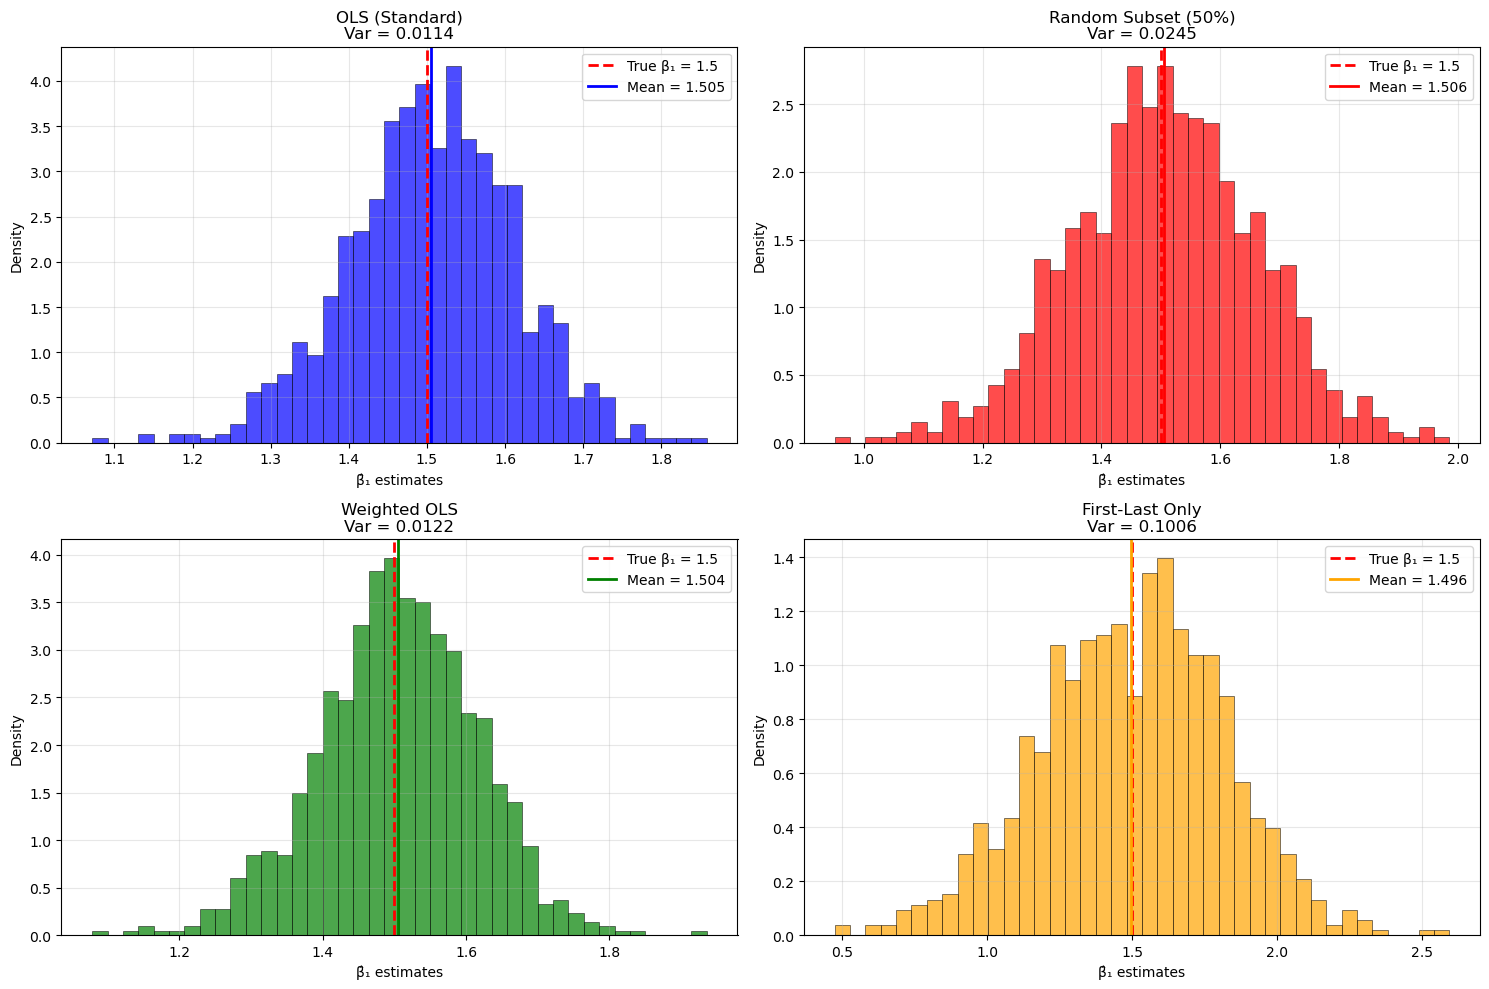

C:\Users\ianta\AppData\Local\Temp\ipykernel_29004\410731583.py:186: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)


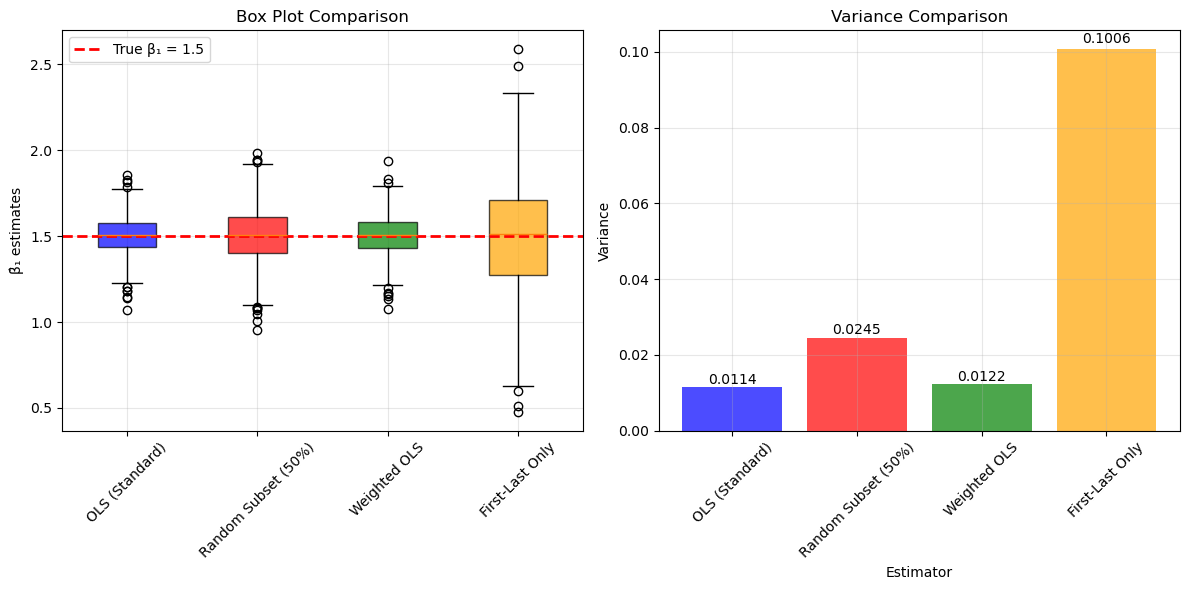


STATISTICAL TESTS FOR UNBIASEDNESS:
---------------------------------------------
OLS            : t = 1.515, p = 0.130 ✓
Random Subset  : t = 1.163, p = 0.245 ✓
Weighted OLS   : t = 1.274, p = 0.203 ✓
First-Last     : t = -0.374, p = 0.709 ✓

All estimators unbiased (p > 0.05): True

KEY TAKEAWAYS:
✓ All estimators are unbiased
✓ All alternative estimators have higher variance than OLS
✓ This demonstrates the BLUE property of OLS
✓ OLS minimizes variance among all linear unbiased estimators


In [12]:
# Set random seed for reproducibility
np.random.seed(67)

def generate_data(n, true_beta0=2, true_beta1=1.5, error_var=4):
    """Generate simple linear regression data"""
    X = np.linspace(1, 10, n)
    errors = np.random.normal(0, np.sqrt(error_var), n)
    Y = true_beta0 + true_beta1 * X + errors
    return X, Y

def ols_estimator(X, Y):
    """Standard OLS estimator for slope"""
    X_design = sm.add_constant(X)
    model = sm.OLS(Y, X_design).fit()
    return model.params[1]  # beta1_hat

def subset_estimator(X, Y, subset_fraction=0.5):
    """
    Alternative Linear Unbiased Estimator: Use only a random subset of observations
    
    This estimator:
    1. Randomly selects a fraction of the observations
    2. Applies OLS to this subset
    3. Is still unbiased (OLS on any subset is unbiased)
    4. Has higher variance due to smaller effective sample size
    """
    n = len(X)
    n_subset = max(2, int(n * subset_fraction))  # Ensure at least 2 observations
    
    # Randomly select subset indices
    subset_indices = np.random.choice(n, size=n_subset, replace=False)
    
    # Apply OLS to subset
    X_subset = X[subset_indices]
    Y_subset = Y[subset_indices]
    
    return ols_estimator(X_subset, Y_subset)

def weighted_ols_estimator(X, Y, weights=None):
    """
    Alternative Linear Unbiased Estimator: Weighted OLS with suboptimal weights
    
    This estimator uses weights that are not optimal (not inversely proportional
    to error variance), leading to higher variance than standard OLS.
    """
    if weights is None:
        # Use suboptimal weights - give less weight to middle observations
        # This is clearly suboptimal for homoscedastic data
        weights = 1 / (1 + 0.1 * (X - np.mean(X))**2)
    
    # Weighted OLS formula
    W = np.diag(weights)
    X_design = sm.add_constant(X)
    
    # β̂ = (X'WX)^(-1)X'WY
    XtWX_inv = np.linalg.inv(X_design.T @ W @ X_design)
    XtWY = X_design.T @ W @ Y
    beta_hat = XtWX_inv @ XtWY
    
    return beta_hat[1]  # return slope estimate

def first_last_estimator(X, Y):
    """
    Alternative Linear Unbiased Estimator: Use only first and last observations
    
    This estimator:
    1. Uses only the first and last observations
    2. Calculates slope as (Y_n - Y_1) / (X_n - X_1)
    3. Is unbiased but has much higher variance
    """
    return (Y[-1] - Y[0]) / (X[-1] - X[0])

def run_comparison_simulation(n_simulations=1000, sample_size=50):
    """Compare OLS with alternative linear unbiased estimators"""
    
    true_beta1 = 1.5
    
    # Storage for estimates
    ols_estimates = []
    subset_estimates = []
    weighted_estimates = []
    first_last_estimates = []
    
    print(f"Running {n_simulations} simulations with sample size {sample_size}...")
    print(f"True β₁ = {true_beta1}")
    print("-" * 60)
    
    for i in range(n_simulations):
        if (i + 1) % 200 == 0:
            print(f"Completed {i + 1}/{n_simulations} simulations...")
        
        # Generate data
        X, Y = generate_data(sample_size)
        
        # Apply different estimators
        ols_estimates.append(ols_estimator(X, Y))
        subset_estimates.append(subset_estimator(X, Y, subset_fraction=0.5))
        weighted_estimates.append(weighted_ols_estimator(X, Y))
        first_last_estimates.append(first_last_estimator(X, Y))
    
    # Convert to arrays
    ols_estimates = np.array(ols_estimates)
    subset_estimates = np.array(subset_estimates)
    weighted_estimates = np.array(weighted_estimates)
    first_last_estimates = np.array(first_last_estimates)
    
    return ols_estimates, subset_estimates, weighted_estimates, first_last_estimates, true_beta1

def analyze_estimators(ols_est, subset_est, weighted_est, first_last_est, true_beta1):
    """Analyze the performance of different estimators"""
    
    estimators = {
        'OLS (Standard)': ols_est,
        'Random Subset (50%)': subset_est,
        'Weighted OLS (Suboptimal)': weighted_est,
        'First-Last Only': first_last_est
    }
    
    print("\nESTIMATOR COMPARISON")
    print("=" * 80)
    print(f"{'Estimator':<25} {'Mean':<10} {'Bias':<10} {'Variance':<12} {'Std Dev':<10} {'Efficiency':<12}")
    print("-" * 80)
    
    results = {}
    ols_variance = np.var(ols_est, ddof=1)
    
    for name, estimates in estimators.items():
        mean_est = np.mean(estimates)
        bias = mean_est - true_beta1
        variance = np.var(estimates, ddof=1)
        std_dev = np.std(estimates, ddof=1)
        efficiency = ols_variance / variance  # Efficiency relative to OLS
        
        results[name] = {
            'mean': mean_est, 'bias': bias, 'variance': variance, 
            'std_dev': std_dev, 'efficiency': efficiency
        }
        
        print(f"{name:<25} {mean_est:<10.4f} {bias:<10.4f} {variance:<12.6f} {std_dev:<10.4f} {efficiency:<12.3f}")
    
    return results

def create_visualizations(ols_est, subset_est, weighted_est, first_last_est, true_beta1):
    """Create visualizations comparing the estimators"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Colors for consistency
    colors = ['blue', 'red', 'green', 'orange']
    estimators = [
        ('OLS (Standard)', ols_est),
        ('Random Subset (50%)', subset_est), 
        ('Weighted OLS', weighted_est),
        ('First-Last Only', first_last_est)
    ]
    
    # Individual histograms
    for idx, (name, estimates) in enumerate(estimators):
        row, col = idx // 2, idx % 2
        ax = axes[row, col]
        
        ax.hist(estimates, bins=40, alpha=0.7, color=colors[idx], 
                density=True, edgecolor='black', linewidth=0.5)
        ax.axvline(true_beta1, color='red', linestyle='--', linewidth=2, 
                   label=f'True β₁ = {true_beta1}')
        ax.axvline(np.mean(estimates), color=colors[idx], linestyle='-', 
                   linewidth=2, label=f'Mean = {np.mean(estimates):.3f}')
        
        ax.set_xlabel('β̂₁ estimates')
        ax.set_ylabel('Density')
        ax.set_title(f'{name}\nVar = {np.var(estimates, ddof=1):.4f}')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Comparison plot
    plt.figure(figsize=(12, 6))
    
    # Box plot comparison
    plt.subplot(1, 2, 1)
    data_to_plot = [est[1] for est in estimators]
    labels = [est[0] for est in estimators]
    
    box_plot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
    for i, box in enumerate(box_plot['boxes']):
        box.set_facecolor(colors[i])
        box.set_alpha(0.7)
    
    plt.axhline(true_beta1, color='red', linestyle='--', linewidth=2, 
                label=f'True β₁ = {true_beta1}')
    plt.ylabel('β̂₁ estimates')
    plt.title('Box Plot Comparison')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Variance comparison bar chart
    plt.subplot(1, 2, 2)
    variances = [np.var(est[1], ddof=1) for est in estimators]
    bars = plt.bar(range(len(estimators)), variances, color=colors, alpha=0.7)
    plt.xlabel('Estimator')
    plt.ylabel('Variance')
    plt.title('Variance Comparison')
    plt.xticks(range(len(estimators)), labels, rotation=45)
    
    # Add value labels on bars
    for bar, var in zip(bars, variances):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{var:.4f}', ha='center', va='bottom')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def demonstrate_theoretical_intuition():
    """Demonstrate why these estimators have higher variance"""
    
    print("\nTHEORETICAL INTUITION")
    print("=" * 50)
    
    print("\n1. RANDOM SUBSET ESTIMATOR:")
    print("   - Uses only 50% of available data")
    print("   - Smaller effective sample size → higher variance")
    print("   - Still unbiased because E[β̂_subset] = E[β̂_OLS] = β")
    print("   - Variance increases roughly by factor of 2 (half the data)")
    
    print("\n2. WEIGHTED OLS WITH SUBOPTIMAL WEIGHTS:")
    print("   - Uses all data but with suboptimal weights")
    print("   - Gives less weight to middle observations")
    print("   - Still unbiased but less efficient than optimal weights")
    print("   - Gauss-Markov theorem: OLS has minimum variance among linear unbiased estimators")
    
    print("\n3. FIRST-LAST ESTIMATOR:")
    print("   - Uses only 2 observations out of n")
    print("   - Extremely high variance due to minimal data usage")
    print("   - Still unbiased: E[(Y_n - Y_1)/(X_n - X_1)] = β₁")
    print("   - Variance ≈ 2σ²/(X_n - X_1)² vs OLS variance ≈ σ²/Σ(x_i - x̄)²")

# Main execution
if __name__ == "__main__":
    print("ALTERNATIVE LINEAR UNBIASED ESTIMATORS")
    print("=" * 60)
    print("Demonstrating estimators that are:")
    print("✓ Linear in Y")
    print("✓ Unbiased for β₁") 
    print("✗ Higher variance than OLS")
    print()
    
    # Show theoretical intuition first
    demonstrate_theoretical_intuition()
    
    # Run simulation
    N_SIMULATIONS = 1000
    SAMPLE_SIZE = 50
    
    ols_est, subset_est, weighted_est, first_last_est, true_beta1 = run_comparison_simulation(
        N_SIMULATIONS, SAMPLE_SIZE
    )
    
    # Analyze results
    results = analyze_estimators(ols_est, subset_est, weighted_est, first_last_est, true_beta1)
    
    create_visualizations(ols_est, subset_est, weighted_est, first_last_est, true_beta1)
    
    # Statistical tests for unbiasedness
    print("\nSTATISTICAL TESTS FOR UNBIASEDNESS:")
    print("-" * 45)
    
    estimator_data = [
        ('OLS', ols_est),
        ('Random Subset', subset_est),
        ('Weighted OLS', weighted_est),
        ('First-Last', first_last_est)
    ]
    
    for name, estimates in estimator_data:
        t_stat, p_val = stats.ttest_1samp(estimates, true_beta1)
        print(f"{name:<15}: t = {t_stat:.3f}, p = {p_val:.3f} {'✓' if p_val > 0.05 else '✗'}")
    
    print(f"\nAll estimators unbiased (p > 0.05): {all(stats.ttest_1samp(est[1], true_beta1)[1] > 0.05 for est in estimator_data)}")
    
    print("\nKEY TAKEAWAYS:")
    print("=" * 30)
    print("✓ All estimators are unbiased")
    print("✓ All alternative estimators have higher variance than OLS")
    print("✓ This demonstrates the BLUE property of OLS")
    print("✓ OLS minimizes variance among all linear unbiased estimators")

<h2>Break down</h2>
<p>So OLS is our gold standard because it is unbiased, and produces minimal variance. However, there are other estimators out there. We explored some unbiased estimators above and found that we can do a couple of things to increase variance while still having an unbiased estimator.</p>
<p>The formulas for an unbiased estimator with higher variance boil down to these three aspects; less data, random noise, and weird weights.</p>
<p>Random Subset == random noise</p>
<p>Weighted OLS == weird weights</p>
<p>First-Last == less data</p>

<p>This doesn't mean we use OLS for everything! There are situations where different estimators shine brighter and produce better results. OLS is usually the default for a myriad of reasons but that doesn't mean we should write off other estimators.</p>

(3) The Likelihood Function for a linear regression under the assumption that the error terms are normally distributed with variance $\sigma^2$ is:
$$
L(\beta_{0},\beta_{1},\sigma^{2}\;\bigm|\;y_{i},x_{i})
=
(2\pi\,\sigma^{2})^{-\frac{n}{2}}
\exp\!\Biggl(
  -\frac{1}{2\,\sigma^{2}}
  \sum_{i=1}^{n}\bigl(y_{i}-\beta_{0}-\beta_{1}x_{i}\bigr)^{2}
\Biggr)
$$
explain the terms of the Likelihood function then prove that this likelihood function leads to the same estimator as OLS under the classic assumptions. I'm okay with you using mathematical software like Mathematica or AI, or any other resources to help with this problem. Explain when an analyst might choose to use Maximum Likelihood estimation for regression in the context of the assumptions.

<h2>(3) Written Answer</h2>
<p>Before we get to the math heavy portion, lets break this down into simpler terms.</p>
<p>Write off the bat we can see some recognizable functions like our linear regression equation, and the 2pisigma^2 looks an awful lot like our gaussian distribution formula. However, the tough part is breaking apart the equations and understanding how they all come together to give us the likelihood function.</p>
<p>We also make our classic OLS assumptions, autocorrelation, normal variance, normal distributed, etc..</p>

$(2\pi\,\sigma^{2})^{-\frac{n}{2}}$ = penalizes small $\sigma^{2}$ 

$\exp\!\Biggl(
  -\frac{1}{2\,\sigma^{2}}
  \sum_{i=1}^{n}\bigl(y_{i}-\beta_{0}-\beta_{1}x_{i}\bigr)^{2}
\Biggr)$ = likelihood falls as the sum of squared errors increases, $1/\sigma^{2}$ will scale differences

<p>We can read these functions as saying that the likelihood is highest when we have small residuals and the model doesn't claim very small variance.</p>

So now lets dive into the math and prove why maximizing the likelihood function is equivalent to OLS.


First we will use log-likelihood because it is the same as maximizing likelihood and is a little simpler.
$$
\ell(\beta_0,\beta_1,\sigma^2)
\;=\;
\log L
\;=\;
-\,\frac{n}{2}\,\log\bigl(2\pi\sigma^2\bigr)
\;-\;
\frac{1}{2\sigma^2}
\sum_{i=1}^n\bigl(y_i-\beta_0-\beta_1 x_i\bigr)^2
$$

We also want to use our SSE function to simplify the likelihood function.
$$\text{SSE}(\beta_0,\beta_1)
\;=\;
\sum_{i=1}^n\bigl(y_i-\beta_0-\beta_1 x_i\bigr)^2
$$

So now we can see that a big chunk of the likelihood function is simplified to $\ell$
$$
\ell
\;=\;
-\,\frac{n}{2}\,\log\bigl(2\pi\sigma^2\bigr)
\;-\;
\frac{\mathrm{SSE}}{2\sigma^2}
$$

Our first step is to maximize with respect to $\beta_0$, $\beta_1$
$\ell$ has a dependency on -$\frac{1}{2\sigma^2}$ and because that portion is negative and constant for a fixed $\sigma^{2}$, maximization of $\ell$ is the same as minimizing SSE.

The minimization of SSE happens during OLS which can be shown using matrix notation.
$$
\mathrm{SSE}
\;=\;
(y - X\beta)^\mathsf{T}(y - X\beta)
$$


Now if we take the derivative of SSE w.r.t $\beta$ and set it to zero since it is a derivation, we get this.
$$
\frac{\partial\,\mathrm{SSE}}{\partial\beta}
\;=\;
-\,2\,X^\mathsf{T}(y - X\beta)
\;=\;0
\;\;\Longrightarrow\;\;
X^\mathsf{T}X\,\widehat\beta
\;=\;
X^\mathsf{T}y
\;\;\Longrightarrow\;\;
\widehat\beta
\;=\;
\bigl(X^\mathsf{T}X\bigr)^{-1}X^\mathsf{T}y
$$

Wow, our $\widehat\beta$ looks exactly like the OLS normal-equations solution which is accurate since the $\beta$ that maximizes the likelihood is this OLS solution.
$\widehat\beta\;=\;\bigl(X^\mathsf{T}X\bigr)^{-1}X^\mathsf{T}y$


So we can also do a TLDR of what happened above with these three functions.
$$
\widehat β_{\mathrm{MLE}}
=\arg\max_β \ell(β,\sigma^2)
=\arg\min_β \mathrm{SSE}(β)
=(X^TX)^{-1}X^Ty.
$$

Thus this ends our proof that the likelihood function leads to the same estimator as OLS under the classic assumptions.

<h2>(3) Written Answer Cont</h2>
<p>When and where we use differing models and equations is always situational, so this is a good question.</p>
<p>An analyst may choose maximum likelihood when errors are normal because MLE gives efficient estimators and likelihood-based tests like AIC/BIC model selection.</p>
<p>Basically if we know the error distribution, we can go beyond OLS limitations and explicitly choose which distribution we want to follow allowing for more efficient and accurate estimates.</p>
<p>This provides flexibility and allows us to adapt better to data since data is usually not clean. So bottom line is that MLE is preferred when the structure of our data or distribution is beyond that of OLS assumptions, and when richer inference tools like AIC/BIC are needed.</p>